#### Fall 2021 | COMP 4721

# Mini-Project 1

###### Wei Chen Huang, Ian Phillips, Beatrice Cobo
---

### Task 1

In [17]:
import numpy as np
import os
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
%matplotlib inline

2.

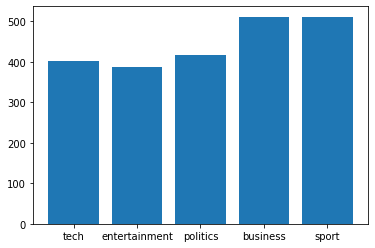

In [4]:
datadir="BBC"
categories=["tech", "entertainment", "politics", "business", "sport"]
txt_array=[];
all_array=[];
for category in categories:  # for each class
    path = os.path.join(datadir,category)  # create path to class
    for txt in os.listdir(path):  # iterate over each text file per class
        txt_array.append(txt)
    all_array.append(len(txt_array))
    txt_array=[]
fig = plt.figure()
plt.bar(categories,all_array)
fig.savefig('BBC-distribution.pdf', dpi=fig.dpi)

3.

In [10]:
corpus=load_files(container_path=datadir,encoding="latin1")
corpus

{'data': ['Tate & Lyle boss bags top award\n\nTate & Lyle\'s chief executive has been named European Businessman of the Year by a leading business magazine.\n\nIain Ferguson was awarded the title by US publication Forbes for returning one of the UK\'s "venerable" manufacturers to the country\'s top 100 companies. The sugar group had been absent from the FTSE 100 for seven years until Mr Ferguson helped it return to growth. Tate\'s shares have leapt 55% this year, boosted by firming sugar prices and sales of its artificial sweeteners.\n\n"After years of a sagging stock price and a seven-year hiatus from the FTSE 100, one of Britain\'s venerable manufacturers has returned to the vaunted index," Forbes said. Mr Ferguson took the helm at the company in 2003, after spending most of his career at consumer goods giant Unilever. Tate & Lyle, which was an original member of the historic FT-30 index in 1935, operates more than 41 factories and 20 more additional production facilities in 28 count

4.

In [11]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus.data)

5.

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,corpus.target, test_size=0.2,random_state=None)

6.

In [41]:
clf = MultinomialNB()
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)

7. (a)

In [42]:
f = open('bbc-performance.txt', 'w')
f.write('---------------------------------------------------------------------------------')
f.write('0 - business category\n')
f.write('1 - entertainment category\n')
f.write('2 - politics category\n')
f.write('3 - sport category\n')
f.write('4 - tech category\n')

17

(b)

In [43]:
confusion_matrix(y_test, predicted)

array([[110,   0,   3,   0,   2],
       [  0,  76,   0,   0,   1],
       [  0,   0,  78,   0,   1],
       [  1,   0,   0,  91,   0],
       [  0,   1,   1,   0,  80]], dtype=int64)